# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [65]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
traffic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  traffic-dataset.zip
replace Traffic Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as l
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [153]:
df = pd.read_csv('/content/Traffic Data.csv')

In [103]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [154]:
# Convert 'Date' column to datetime and set as index
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S') # Changed date format in the dataframe
df.set_index('date_time', inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2017-08-27 01:00:00 to 2018-05-31 18:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [73]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [74]:
df['traffic_volume'].value_counts()

,count
traffic_volume,
353.0,29
344.0,22
373.0,22
340.0,22
358.0,22
...,...
1359.0,1
5607.0,1
4368.0,1


In [155]:
remove_unknown_other_na=df.columns
for column in remove_unknown_other_na:
    mode_value = df[column].replace(['Unknown', 'na', 'Other'], pd.NA).mode()[0]
    df[column] = df[column].replace(['Unknown', 'na', 'Other'], mode_value).fillna(mode_value)

In [106]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


## Plot the time series data.

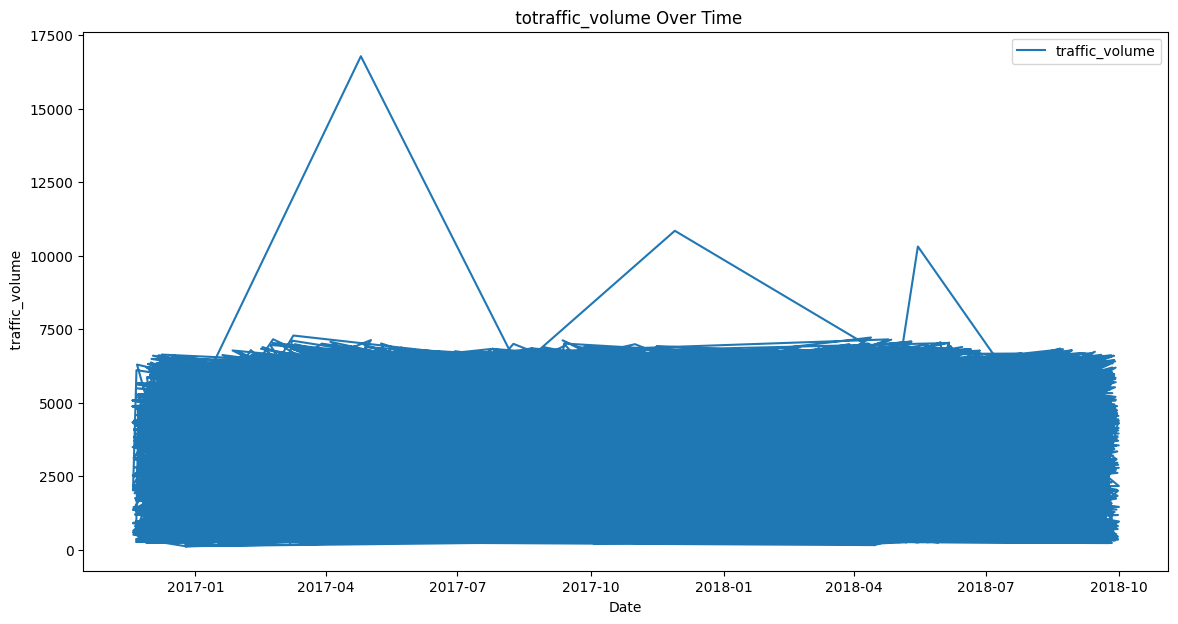

In [130]:
# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(df['traffic_volume'], label='traffic_volume')
plt.title(' totraffic_volume Over Time')
plt.xlabel('Date')
plt.ylabel(' traffic_volume')
plt.legend()
plt.show()

## - Analyze trends, seasonality, and potential outliers

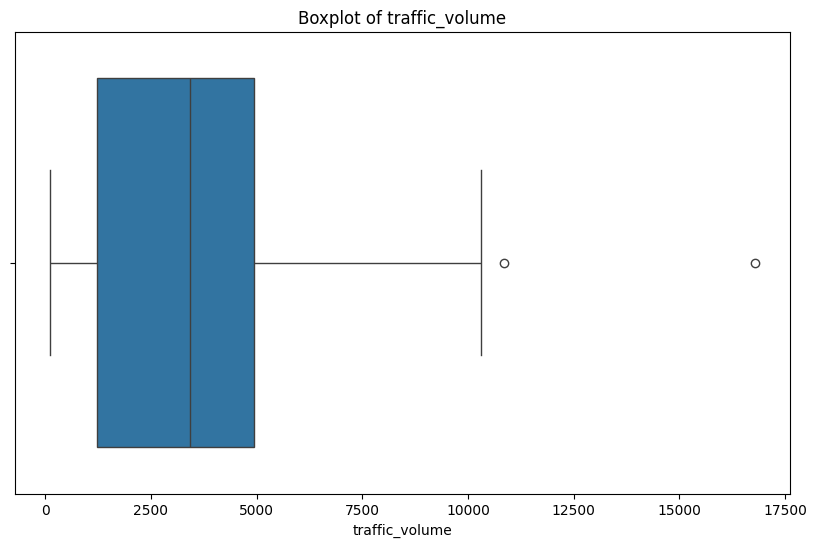

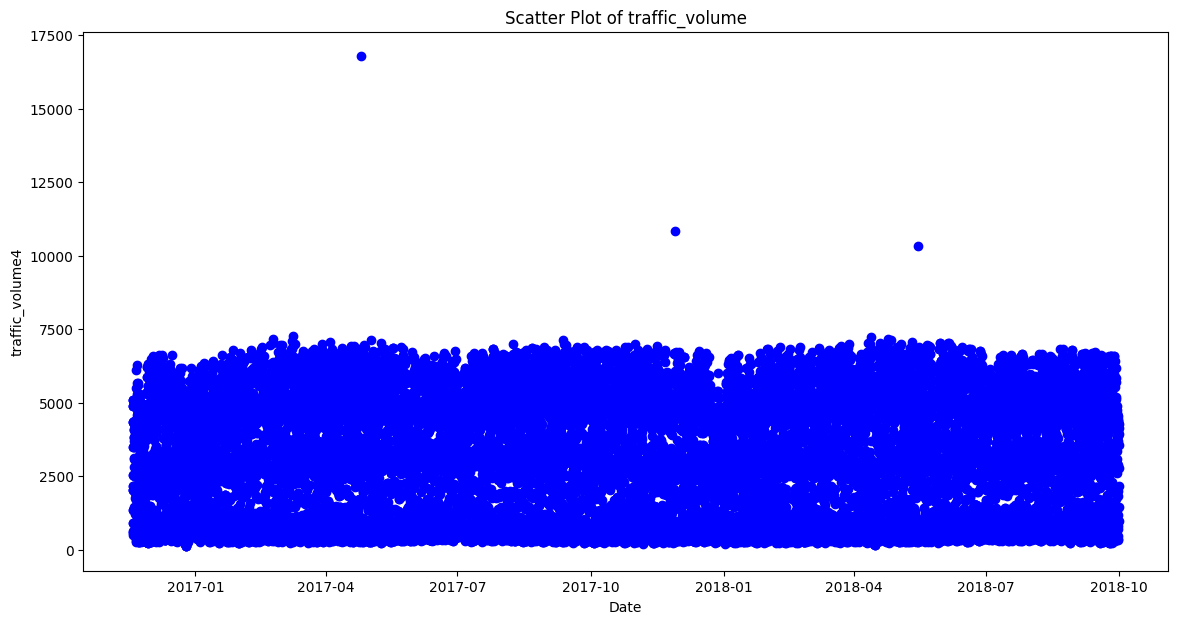

In [131]:
# Boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['traffic_volume'])
plt.title('Boxplot of traffic_volume')
plt.show()

# Scatter plot to identify anomalies
plt.figure(figsize=(14, 7))
plt.scatter(df.index, df['traffic_volume'], label='traffic_volume', color='blue')
plt.title('Scatter Plot of traffic_volume')
plt.xlabel('Date')
plt.ylabel('traffic_volume4')
plt.show()


## - Seasonal Decomposition:

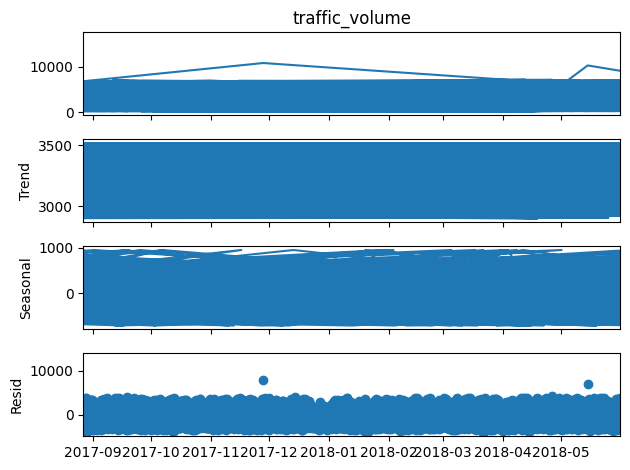

In [132]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(df['traffic_volume'], model='additive', period=365)
result =decomposition
result.plot()
pyplot.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [133]:
#  lags
df['Lag1'] = df['traffic_volume'].shift(1)
df['Lag2'] = df['traffic_volume'].shift(2)

#  moving average features
df['Moving_Avg_7'] = df['traffic_volume'].rolling(window=7).mean()

In [178]:
df.dropna(inplace = True)

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [134]:

# 1. إنشاء عمود  باستخدام shift
df['traffic_volume'] =df['traffic_volume'].shift(1)

# 2. استخراج الميزات الزمنية
df['Day_of_Week'] = df.index.dayofweek  # يوم الأسبوع (0=الإثنين، 6=الأحد)
df['Month'] = df.index.month            # الشهر
df['Day_of_Year'] = df.index.dayofyear  # يوم السنة


# 3. حساب الفرق بين القيم المتتالية
df['traffic_volume_diff'] = df['traffic_volume'].diff()

In [137]:
df.sample()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Lag1,Lag2,Moving_Avg_7,Day_of_Week,Month,Day_of_Year,traffic_volume_diff
date_time,,,,,,,,,,,,,,
2017-12-09 23:00:00,2227.0,268.28,0.0,0.0,90,Clouds,overcast clouds,2227.0,2133.0,2526.285714,5,12,343,94.0


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [179]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

#selecting the feature for the train
data = df[['traffic_volume']]
#data scaleing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
# to greate sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60  # this is the number of lock back in the sequences
X, y = create_sequences(scaled_data, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [180]:
y_test.shape

(3988,)

In [181]:
vistest = df[split:]
vistest.shape

(4048, 7)

In [159]:
tf.random.set_seed(7)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [182]:
regressor = Sequential([
    l.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    l.Dropout(0.2),
    l.LSTM(units=50, return_sequences=True),
    l.Dropout(0.2),
    l.LSTM(units=50),
    l.Dropout(0.2),

    l.Dense(units=1)
])

regressor.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [183]:
regressor.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0159
Epoch 2/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0145
Epoch 3/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0144
Epoch 4/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0144
Epoch 5/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0143
Epoch 6/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0143
Epoch 7/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0143
Epoch 8/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0143
Epoch 9/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0143
Epoch 10/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0143


### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [184]:
prediction_lstm = regressor.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

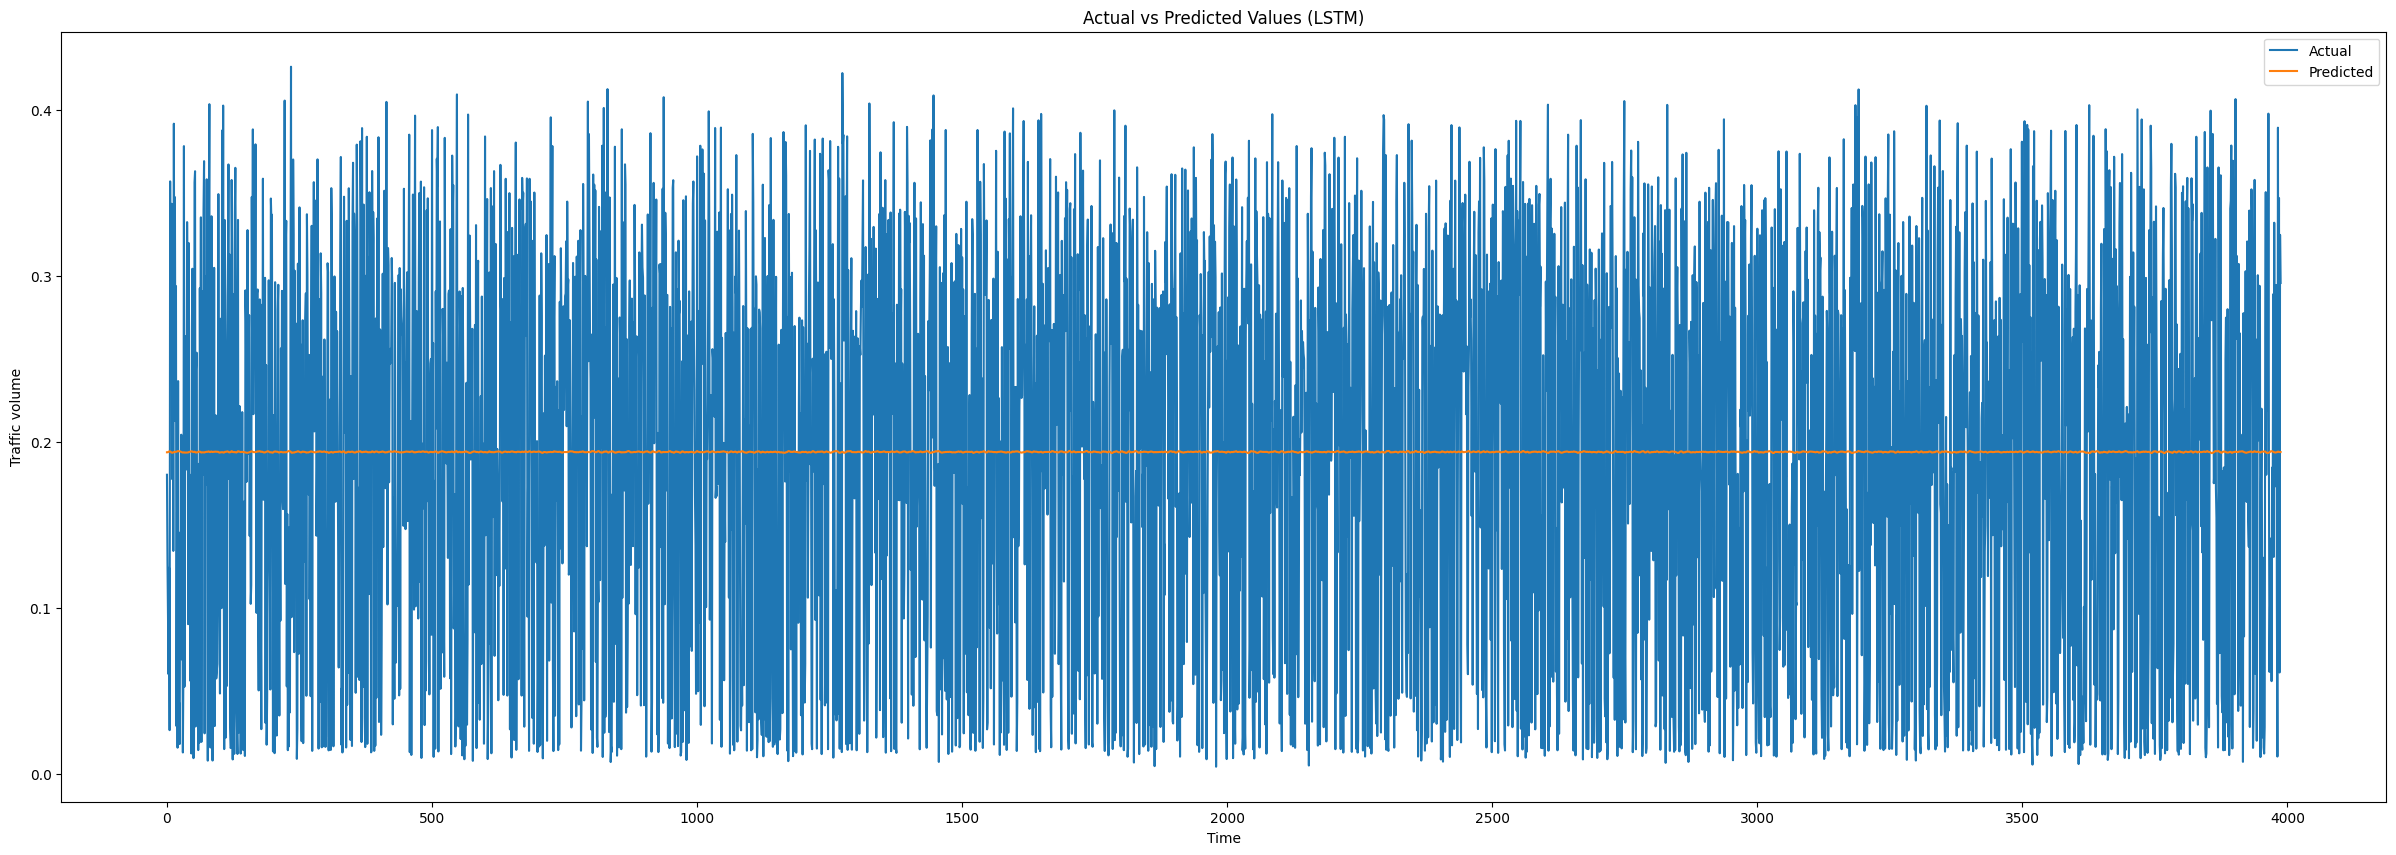

In [185]:
plt.figure(figsize=(30, 10))
plt.plot(y_test, label='Actual')
plt.plot(prediction_lstm, label='Predicted')
plt.title('Actual vs Predicted Values (LSTM)')
plt.xlabel('Time')
plt.ylabel('Traffic volume')
plt.legend()
plt.show()

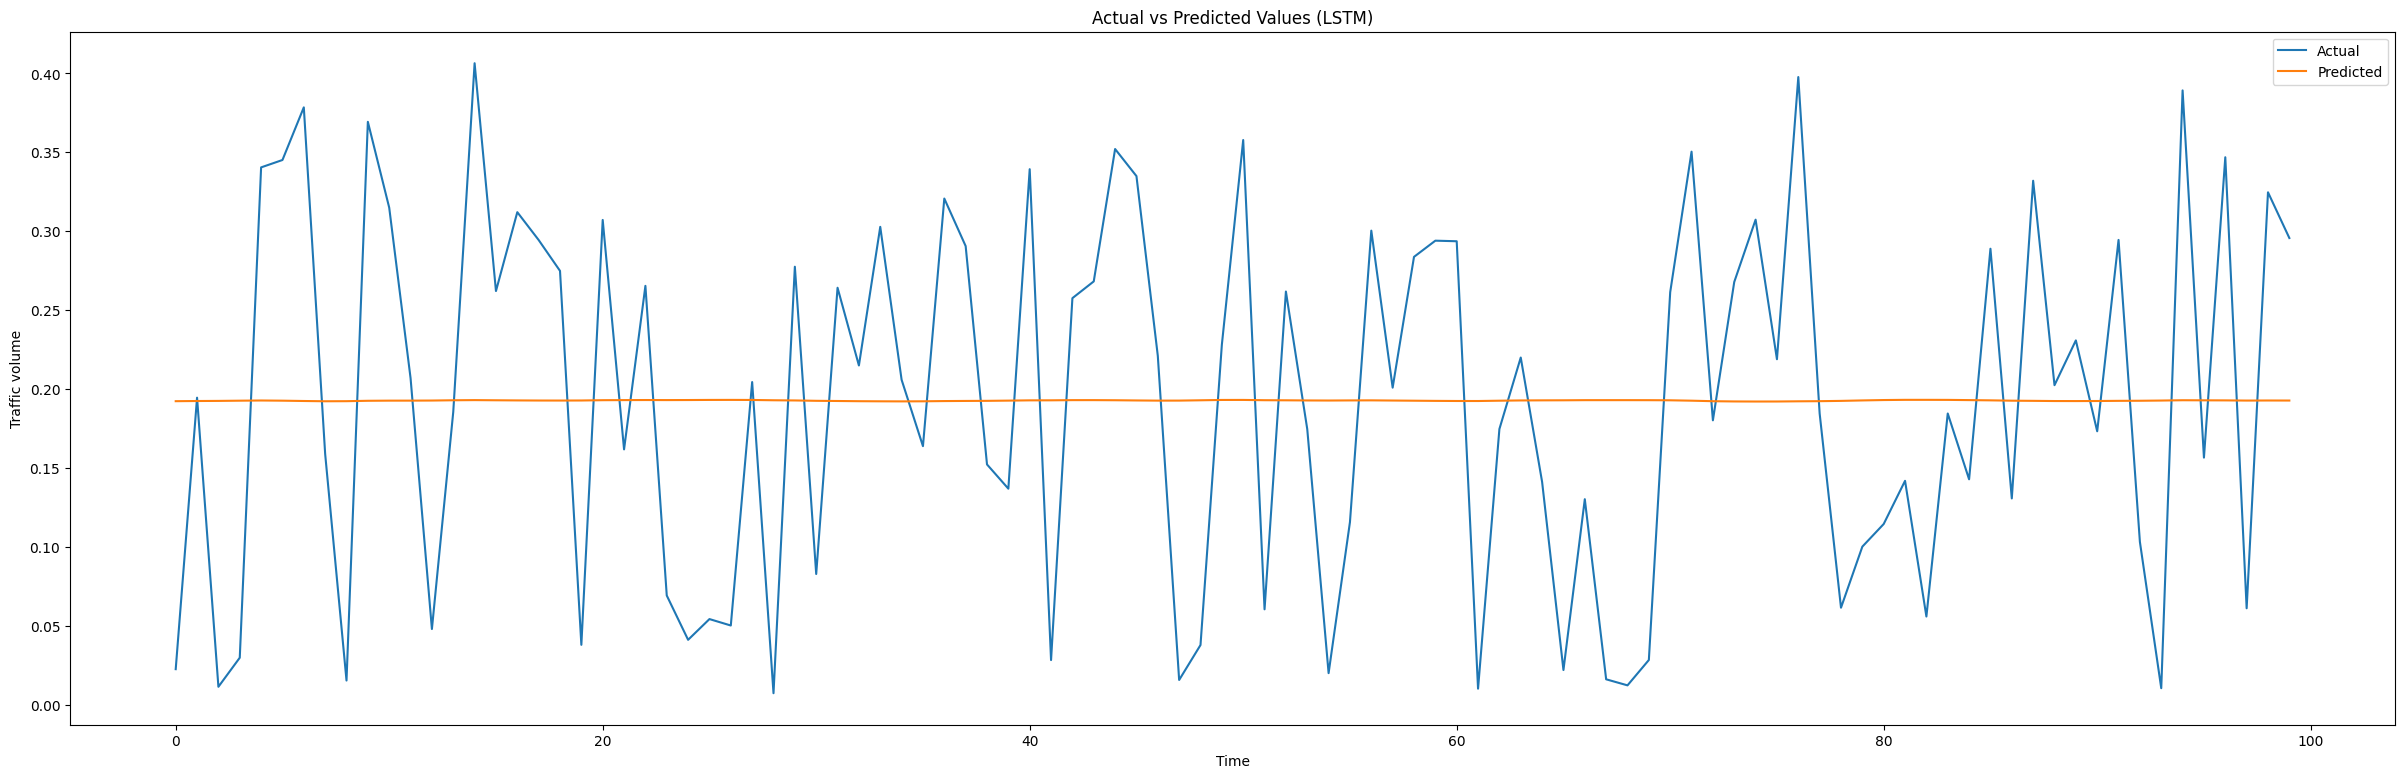

In [164]:
plt.figure(figsize=(30, 9))
plt.plot(y_test[-100:], label='Actual')
plt.plot(prediction_lstm[-100:], label='Predicted')
plt.title('Actual vs Predicted Values (LSTM)')
plt.xlabel('Time')
plt.ylabel('Traffic volume')
plt.legend()
plt.show()

In [165]:
prediction_lstm_inv = scaler.inverse_transform(prediction_lstm.reshape(-1, 1))
y_test_actual_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

In [166]:
mse = mean_squared_error(y_test_actual_inv, prediction_lstm_inv)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 3840059.11


In [167]:

rmse = mean_squared_error(y_test_actual_inv, prediction_lstm_inv, squared=False)
print(f"Root Mean Squared Error : {rmse:.2f}")

Root Mean Squared Error : 1959.61


### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [168]:
model = Sequential([
    l.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    l.GRU(units=50, return_sequences=True),
    l.GRU(units=50, return_sequences=False),
    l.Dense(units=25),
    l.Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [170]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0143 - val_loss: 0.0138
Epoch 2/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0143 - val_loss: 0.0138
Epoch 3/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0143 - val_loss: 0.0138
Epoch 4/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0143 - val_loss: 0.0139
Epoch 5/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.0143 - val_loss: 0.0139


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [171]:
prediction_gru = model.predict(X_test)
prediction_gru = scaler.inverse_transform(prediction_gru.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [176]:
trainScore = np.sqrt(mean_squared_error(y_test_actual_inv, prediction_lstm_inv))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_actual_inv, prediction_lstm_inv))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1959.61 RMSE
Test Score: 1959.61 RMSE


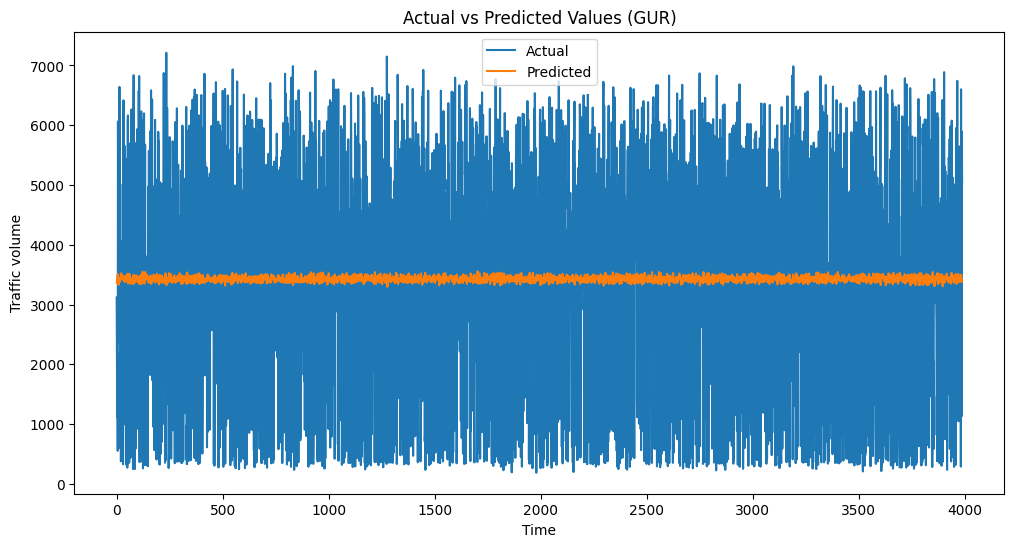

In [172]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(prediction_gru, label='Predicted')
plt.title('Actual vs Predicted Values (GUR)')
plt.xlabel('Time')
plt.ylabel('Traffic volume')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:


1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?



 Replace missing values using Mode in the column was used.
The missing values may adversely affect the accuracy of the form. Replacing unwanted values (such as "Unknown", "na", "Other") with the most common values (column mode) helps keep data balanced.
Improve the performance of models

2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.

 Yes
1-
Create lag features:
Resolution: You have created delay features for a number of previous values from the target variable of previous values.
2-Variable Transformations
3-Moving Averages)

3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?



 To meet the needs of time series analysis. Using LSTM with multiple layers allows the model to handle complex time dependence and accurately predict
GPUs are designed to process large amounts of data in a short time.

4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?


Batch Size:

Choice: You choose a batch size of 32.
Reason:
Batch size 32 is a common and effective value in most learning applications
Optimizer:

Choice: I used Adam Enhancer.
Number of periods (Epochs):

Choice: Set the number of periods to 10.


5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?


Performance measurements, allowing an accurate and comprehensive evaluation of model performance in time series forecasting

6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?


Ensure that it gets accurate results. By adjusting the basic parameters
This has led to a more effective model in predicting time series.



8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

Fourier Transform: Using the Fourier transform to analyze different seasonal patterns and frequencies in data.
SARIMA: The SARIMA (Seasonal ARIMA) model can be tried to better capture seasonal patterns in the data.